In [ ]:
import os
import numpy as np
import itertools
import pandas as pd
from collections import OrderedDict
from scipy.special import comb
from statsmodels.stats.proportion import proportion_confint
import seaborn as sns
import matplotlib.pyplot as plt
#from math import comb
import glob
pd.set_option('display.expand_frame_repr', False)
np.set_printoptions(linewidth=1000)
pd.set_option("display.max_columns", None)
import matplotlib
from tqdm import tqdm
import math
#matplotlib.get_backend()
#matplotlib.use('module://backend_interagg')



In [ ]:
#The code below installs 3.10 (assuming you now have 3.8) and restarts environment, so you can run your cells.

import sys #for version checker
import os #for restart routine

if '3.10' in sys.version:
  print('You already have 3.10')
else:
  #install python 3.10 and dev utils
  #you may not need all the dev libraries, but I haven't tested which aren't necessary.
  !sudo apt-get update -y
  !sudo apt-get install python3.10 python3.10-dev python3.10-distutils libpython3.10-dev
  !sudo apt-get install python3.10-venv binfmt-support #recommended in install logs of the command above

  #change alternatives
  !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1
  !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 2

  # install pip
  !curl -sS https://bootstrap.pypa.io/get-pip.py | python3.10
  !python3 get-pip.py --force-reinstall

  #install colab's dependencies
  !python3 -m pip install setuptools ipython ipython_genutils ipykernel jupyter_console prompt_toolkit httplib2 astor

  #minor cleanup
  !sudo apt autoremove

  #link to the old google package
  !ln -s /usr/local/lib/python3.8/dist-packages/google /usr/local/lib/python3.10/dist-packages/google
  #this is just to verify if 3.10 folder was indeed created
  !ls /usr/local/lib/python3.10/

  #restart environment so you don't have to do it manually
  os.kill(os.getpid(), 9)

You already have 3.10


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
addiotional_cells = pd.read_feather('gdrive/My Drive/Allen Institute- Internship/Data/v1dd_with_additional_coregistered_neurons/additional_coregistered_neurons/pre_cell_table_v1dd_proofread_True_additional_cells.feather')

In [ ]:
cell_types = np.array(addiotional_cells['cell_type']);
cell_layers = np.array(addiotional_cells['soma_layer']);

In [ ]:
np.shape(cell_types)

(706,)

In [ ]:
#v1dd_cell_layer = np.load('gdrive/My Drive/Allen Institute- Internship/Downloads/cell_types_v1dd.npy', allow_pickle=True)

In [ ]:
#np.shape(v1dd_cell_layer)

(668,)

In [ ]:
#%% Loading the datasets
#os.chdir('/home/reca/Dropbox (uwamath)/Dimensionality_Moritz/aisynphys')
datafolder = 'EMdata/data'
modelsfolder = 'EMdata/models'
datas = glob.glob(datafolder+'/*')
models = glob.glob(modelsfolder+'/*')

EM_data = []
EM_data_names = []

EMconn_groundtruth = np.load('gdrive/My Drive/Allen Institute- Internship/Data/ground_truth_v1dd_square_binary_connectome_additional_cells.npy')
#EMconn_groundtruth = np.load("/home/Sai/EM_Data_full_ground_truth_connectome_new.npy")
EM_data.append(EMconn_groundtruth)
EM_data_names.append('data')
for model in models:
    EMconn_model = np.load(model)
    EM_data.append(EMconn_model)
    model_name = '_'.join(model.split('.')[:-1][0].split('_')[-3:])
    EM_data_names.append(model_name)

EMconn_celltypes = cell_types;
EMconn_layers = cell_layers;

#EMconn_celltypes = np.load(r'C:\Users\sai.kate\Downloads\cell_types_v1dd.npy', allow_pickle=True)
#EMconn_layers = np.load(r'C:\Users\sai.kate\Downloads\cell_layers_v1dd.npy', allow_pickle=True)

#EMconn_celltypes = np.load('/home/Sai/EM_Data_microns_proofread_True_sorted_cell_types.npy', allow_pickle=True)
#EMconn_layers = np.load('/home/Sai/EM_Data_microns_proofread_True_sorted_layers.npy', allow_pickle=True)

d = {"cells": EMconn_celltypes, "layers": EMconn_layers}
df = pd.DataFrame(data = d,index=None)
blankIndex=[''] * len(df)
df.index=blankIndex
df['combine'] = df['cells']+'-'+df['layers']
df = df.loc[df.duplicated(keep=False)]

x = df['combine']
EM_groups = np.array(x)


In [ ]:
'''
# # # #STATISTICAL CONNECTOME:
prediction_matrix = np.load(r'C:\Users\sai.kate\Downloads\v1dd_full_cloud_lambda_predictions.npy')  #or the other filename, depending
#prediction_matrix = np.load(r'C:\Users\sai.kate\Downloads\Data\pred_matrix_corrected.npy')
#prediction_matrix = np.load(r'C:\Users\sai.kate\Downloads\Data\pred_matrix_corrected_diff_cons.npy')
#prediction_matrix = np.load(r'C:\Users\sai.kate\Downloads\Data\pred_matrix_corrected_diff_updated.npy')
binarized_instantiated_prediction_matrix = np.random.poisson(np.abs(prediction_matrix)).clip(0,1)

#%% Loading the datasets
#os.chdir('/home/reca/Dropbox (uwamath)/Dimensionality_Moritz/aisynphys')
datafolder = 'EMdata/data'
modelsfolder = 'EMdata/models'
datas = glob.glob(datafolder+'/*')
models = glob.glob(modelsfolder+'/*')

#EM_data = []
#EM_data_names = []

EMconn_stat = binarized_instantiated_prediction_matrix
#EMconn_groundtruth = np.load("/home/Sai/EM_Data_full_ground_truth_connectome.npy")
EM_data.append(EMconn_stat)
EM_data_names.append('cloud_synapse_count')
for model in models:
    EMconn_model = np.load(model)
    EM_data.append(EMconn_model)
    model_name = '_'.join(model.split('.')[:-1][0].split('_')[-3:])
    EM_data_names.append(model_name)
    '''

In [ ]:
x.value_counts()

23P-4      181
6P-6        84
4P-5        49
23P-23      48
BC-5        45
BC-6        41
BC-4        37
MC-5        36
5P-IT-5     23
NGC-23      21
MC-6        20
5P-ET-6     18
5P-IT-6     17
BPC-4       13
MC-4        13
5P-PT-5     10
23P-5       10
5P-ET-5      9
5P-PT-6      7
4P-4         5
BPC-5        5
BPC-23       4
MC-23        4
BC-23        4
Name: combine, dtype: int64

In [ ]:
df.value_counts()
cells_23 = df.query('(layers == "23")')
#Full type- so one focues on dense + sparse areas. Check overrepresentation later
#So col trained model overpredicts, so new model away from column it will underpredict
cells_23.value_counts()

cells  layers  combine
23P    23      23P-23     48
NGC    23      NGC-23     21
BC     23      BC-23       4
BPC    23      BPC-23      4
MC     23      MC-23       4
dtype: int64

In [ ]:
#%% Recomputing motifs

# groups: list of all total neurons that are in the 668 connectome, as cell types
# cats: list of all possible cell types

def compute_motifs(connectivity_matrix, groups, cats):
    df_mot = pd.DataFrame()

    idxs_neu, = np.where([cat in cats for cat in groups])
    for i_neu in tqdm(idxs_neu):
        conn_row = np.delete(connectivity_matrix[i_neu,:],i_neu)
        conn_col = np.delete(connectivity_matrix[:,i_neu],i_neu)
        idxs_row = np.where(conn_row)[0]   #gives all the cells that cell[i_neu] connects to (cell[i_neu]to cell[x]'s(cell[x] is multiple))
        idxs_col = np.where(conn_col)[0]   #gives all the cells that connect to cell[i_neu] (cell[x]'s(cell[x] is multiple)' to cell[i_neu])
        groups_neu = np.delete(groups, i_neu)
        cat_neu = groups[i_neu]
        for (cat1, cat2) in itertools.product(cats, cats):
            idxs_cat1, = np.where(groups_neu==cat1)    #index position where neuron type =NGC
            idxs_cat2, = np.where(groups_neu==cat2)    #index position where neuron type =NGC
            N_cat1 = len(idxs_cat1)
            N_cat2 = len(idxs_cat2)
            if N_cat1 == 0 or N_cat2==0:
                        print("Error:0")
            idxs_mot_row_cat1, idxs_mot_col_cat1 = np.intersect1d(idxs_row, idxs_cat1), np.intersect1d(idxs_col, idxs_cat1)
            #intersect_row will check row & cat1- so, cell[i_neu] to cat1,  intersect_col will check col and cat1- so, cat1 to cell[i_neu]
            for i in idxs_mot_col_cat1:
              conn_row_cat1 = np.delete(connectivity_matrix[i,:],i)
              conn_col_cat1 = np.delete(connectivity_matrix[:,i],i)
              idxs_row_cat1 = np.where(conn_row_cat1)[0]   #gives all the cells that cell[i_neu] connects to (cell[i_neu]to cell[x]'s(cell[x] is multiple))
              idxs_col_cat1 = np.where(conn_col_cat1)[0]
              #df_conn = pd.DataFrame({'conns':idxs_row_cat1})
            idxs_mot_row_cat2, idxs_mot_col_cat2 = np.intersect1d(idxs_row, idxs_cat2), np.intersect1d(idxs_col, idxs_cat2)
            N_mot_row_cat1, N_mot_col_cat1 = len(idxs_mot_row_cat1), len(idxs_mot_col_cat1)
            N_mot_row_cat2, N_mot_col_cat2 = len(idxs_mot_row_cat2), len(idxs_mot_col_cat2)
            if cat1==cat2:
                correction = 1 # This effectively does comb(#,2) if the two categories are identical
                div = 2
            else:
                correction = 0
                div = 1
            for motif_type in ['reciprocal', 'chain', 'convergent', 'divergent']:
                if motif_type == 'reciprocal':
                    if cat1 == cat2:
                        idxs_mot_rec = np.intersect1d(idxs_mot_col_cat1, idxs_mot_row_cat1)
                        motif_check = N_cat1
                        if motif_check == 0:
                            print("Error 0")
                        motif_found = len(idxs_mot_rec)
                    else:
                        continue
                if motif_type == 'chain':
                    motif_check = N_cat1 * N_cat2
                    motif_found = N_mot_col_cat1 * N_mot_row_cat2
                if motif_type == 'convergent':
                    motif_check = N_cat1 * (N_cat2-correction) / div
                    motif_found = N_mot_col_cat1 * (N_mot_col_cat2-correction) / div
                if motif_type == 'divergent':
                    motif_check = N_cat1 * (N_cat2 - correction) / div
                    motif_found = N_mot_row_cat1 * (N_mot_row_cat2 - correction) / div
                df_motnew = pd.DataFrame({'motif_type': motif_type, 'neu_cat_0': cat_neu, 'neu_cat_1': cat1, 'neu_cat_2': cat2, 'check': motif_check, 'found': motif_found}, index=[0])
                df_mot = pd.concat([df_mot, df_motnew], axis=0)
    df_mot = df_mot.groupby(['motif_type', 'neu_cat_0', 'neu_cat_1', 'neu_cat_2']).sum().reset_index()
    df_mot['p_mot'] = df_mot.apply(lambda x: x['found'] / x['check'], axis=1)
    df_mot['motif probability intervals'] = df_mot.apply(lambda x: connection_probability_ci(x['found'], x['check'], alpha=0.05)[0], axis=1)
    df_mot['p_mot_lower'] = df_mot.apply(lambda x: connection_probability_ci(x['found'], x['check'], alpha=0.05)[1], axis=1)
    return df_mot


In [ ]:
#%%
def connection_probability_ci(n_connected, n_probed, alpha=0.05):
    assert n_connected <= n_probed, "n_connected must be <= n_probed"
    if n_probed == 0:
        return (0, 1)
    ci = proportion_confint(n_connected, n_probed, alpha=alpha, method='beta')
    # ci = poisson_interval(n_connected, alpha=alpha)/n_probed
    return ci

def cats2prodcat(paircats, cat_tags, sort_flag=True):
    if sort_flag:
        sortpair = np.sort(paircats)
    else:
        sortpair = paircats
    cat_tag = str(sortpair[0]) + str(sortpair[1])
    cat_tags_rep = np.array([tag.replace('_','') for tag in cat_tags])
    cat_id = np.where(cat_tags_rep == cat_tag)[0][0]
    cat_tag = cat_tags[cat_id]
    return cat_id, cat_tag

def divide_chunks(l, n, random_flag=False, k=1):
    for i_k in range(k):
        if random_flag:
            l = np.random.permutation(l)
        for i in np.arange(0, len(l), n):
            yield l[i:i + n]


In [ ]:
type(EM_groups)
#np.unique(EM_groups)


numpy.ndarray

In [ ]:
##%% Looping over datasets selecting celltypes

#cats = np.unique(cells_23['combine'])   ///for layer 23 only - analysis
#np.unique(cells_23['combine'])
#['NGC-5','NGC-6']
cats = np.unique(EM_groups)
groups = EM_groups
#cats = ['23P','BC','MC','5P-IT','NGC']
#groups = EMconn_celltypes
df_mot_all = pd.DataFrame()

for i_data in np.arange(len(EM_data)):
    print(i_data)
    EM_data_name = EM_data_names[i_data]
    EM_dataset = EM_data[i_data]
    if len(EM_dataset.shape) == 3:
        EM_dataset = EM_dataset[:,:,0]
    connectivity_matrix = (EM_dataset!=0).astype(int)
    df_mot = compute_motifs(connectivity_matrix, groups, cats)
    #df_conn = compute_motifs(connectivity_matrix, groups, cats)
    df_mot['dataset'] = EM_data_name
    df_mot_all = pd.concat([df_mot_all, df_mot], axis=0)



0


  3%|▎         | 21/704 [00:57<41:15,  3.62s/it]

In [ ]:
df_mot_all

,motif_type,neu_cat_0,neu_cat_1,neu_cat_2,check,found,p_mot,motif probability intervals,p_mot_lower,dataset
0,chain,23P-23,23P-23,23P-23,106032.0,844.0,0.007960,0.007434,0.008513,data
1,chain,23P-23,23P-23,BC-23,9024.0,216.0,0.023936,0.020882,0.027303,data
2,chain,23P-23,23P-23,BPC-23,9024.0,103.0,0.011414,0.009326,0.013826,data
3,chain,23P-23,23P-23,MC-23,9024.0,237.0,0.026263,0.023062,0.029775,data
4,chain,23P-23,23P-23,NGC-23,47376.0,280.0,0.005910,0.005240,0.006642,data
...,...,...,...,...,...,...,...,...,...,...
395,reciprocal,NGC-23,23P-23,23P-23,1008.0,22.0,0.021825,0.013727,0.032858,data
396,reciprocal,NGC-23,BC-23,BC-23,84.0,2.0,0.023810,0.002897,0.083374,data
397,reciprocal,NGC-23,BPC-23,BPC-23,84.0,2.0,0.023810,0.002897,0.083374,data
398,reciprocal,NGC-23,MC-23,MC-23,84.0,1.0,0.011905,0.000301,0.064552,data


In [ ]:
from matplotlib.lines import Line2D

<ipython-input-57-c16a7956bc79>:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mot_plot, x='Motifs', y='p_mot_lower', hue='dataset', ci=None, ax=ax,linewidth=0,edgecolor=".5")#, facecolor='black')
<ipython-input-57-c16a7956bc79>:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mot_plot, x='Motifs', y='motif probability intervals', hue='dataset', ci=None, ax=ax,linewidth=0, color='white')
<ipython-input-57-c16a7956bc79>:34: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:white'` for the same effect.

  sns.barplot(data=df_mot_plot, x='Motifs', y='motif probability intervals', hue='dataset', ci=None, ax=ax,linewidth=0, color='white')
<ipython-input-57-c16a7956bc79>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rota

<Figure size 640x480 with 0 Axes>

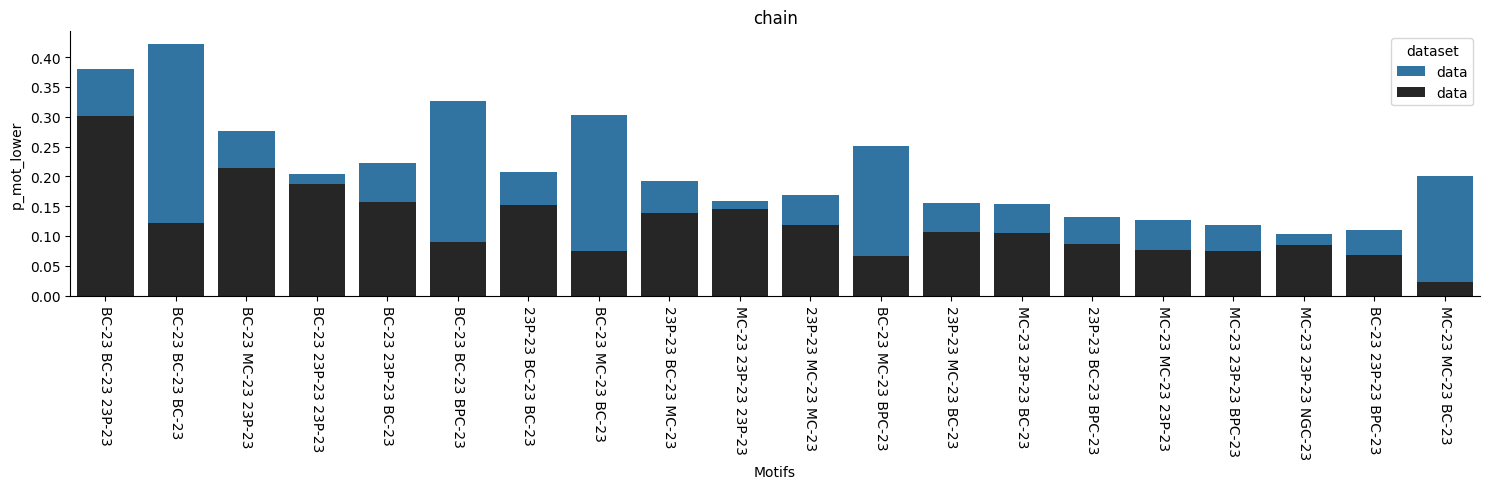

In [ ]:
#%% Adjusting dataframe cells
df_mot_all['Motifs'] = df_mot_all['motif_type'] + '_' + df_mot_all['neu_cat_0'] + '_' + df_mot_all['neu_cat_1'] + '_' + df_mot_all['neu_cat_2']
idxs_motifs_list = [i for i, x in enumerate(df_mot_all['Motifs']) if 'chain' in x]
df_mot_plot =df_mot_all.iloc[idxs_motifs_list]

#%% Plotting
models2plot = ['data', 'cloud_synapse_count', 'reyni_synapse_count']
df_mot2plot = df_mot_all.loc[df_mot_all['dataset'].isin(models2plot),:]

cmap = plt.cm.inferno

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], lw=8),
                Line2D([0], [0],color='orange', lw=8),
                Line2D([0], [0], color=cmap(1.), lw=4)]

fig, ax = plt.subplots()
#lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot'])

plt.clf()
fig, ax = plt.subplots(figsize=(15,5))
#for i_mot,motif_type in enumerate(['reciprocal', 'chain', 'convergent', 'divergent']):
for i_mot,motif_type in enumerate(['chain']):
    idxs_motifs_list = [i for i, x in enumerate(df_mot2plot['Motifs']) if motif_type in x]
    df_mot_plot = df_mot2plot.iloc[idxs_motifs_list]
    df_mot_top = df_mot_plot[df_mot_plot['dataset']=='data'].sort_values(by='p_mot')[::-1]
    top_motifs = df_mot_top['Motifs'].values[:20]
    df_mot_plot = df_mot_plot.loc[df_mot_plot['Motifs'].isin(top_motifs),:]
    category_type = pd.api.types.CategoricalDtype(categories=top_motifs, ordered=True)
    df_mot_plot['Motifs'] = df_mot_plot['Motifs'].astype(category_type)
    # dfall= pd.DataFrame.from_dict({'Motifs': motifs_list, 'tau':alltaus[idxs_taus], 'tau_cim':alltaus_errors_abs[idxs_taus,0], 'tau_cip':alltaus_errors_abs[idxs_taus,1],'syn': 'all'})
    sns.barplot(data=df_mot_plot, x='Motifs', y='p_mot_lower', hue='dataset', ci=None, ax=ax,linewidth=0,edgecolor=".5")#, facecolor='black')
    sns.barplot(data=df_mot_plot, x='Motifs', y='motif probability intervals', hue='dataset', ci=None, ax=ax,linewidth=0, color='white')

    # sns.barplot(data=df_mot_plot, x='Motifs', y='p_mot_upper', hue='dataset', ci=None, ax=ax[i_mot],linewidth=1, edgecolor=".5", color='white')#, facecolor=(0, 0, 0, 0))
    plt.setp(ax.patches, linewidth=0)

    # plt.errorbar(x=np.arange(len(df_mot_all)), y=df_mot_all['p_mot'], yerr=np.abs(df_mot_all[['p_mot_lower', 'p_mot_upper']].values).transpose(), fmt='none', c= 'r')
    # plt.xticks(rotation=-45)
    labels = [' '.join(x.split('_')[1:]) for x in top_motifs]
    ax.set_xticklabels(labels, rotation = -90)
    #ax[i_mot].set_y
    ax.set_title(motif_type)
    #ax.legend(custom_lines,['ground truth','statistical connectome'])



    handles, labels = ax.get_legend_handles_labels()


sns.despine()
plt.tight_layout()

fig1 = plt.gcf()
plt.show()


fig1.savefig('gdrive/My Drive/Allen Institute- Internship/Data/figures/chain_additional_cells_ly23.png', dpi=1200)
#fig1.savefig('C:/Users/sai.kate/Downloads/Data/figures/chain_pred_stat.png', dpi=1200)


<Axes: xlabel='found', ylabel='neu_cat_0'>

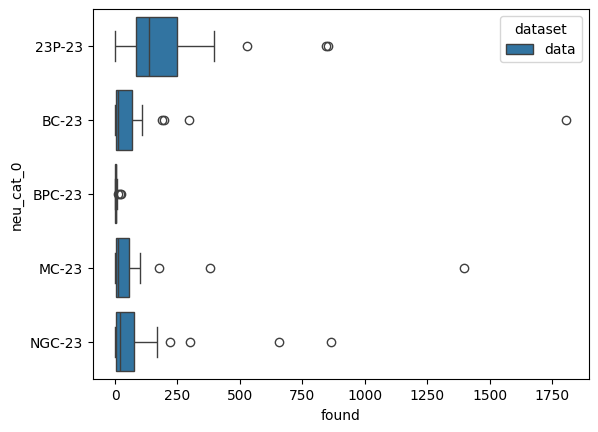

In [ ]:

df_chain = df_mot_all.query("(motif_type == 'chain')")
# create grouped boxplot
sns.boxplot(x = df_chain['found'],
            y = df_chain['neu_cat_0'],
            hue = df_chain['dataset'])

In [ ]:
df_chain

,motif_type,neu_cat_0,neu_cat_1,neu_cat_2,check,found,p_mot,motif probability intervals,p_mot_lower,dataset,Motifs
0,chain,23P-23,23P-23,23P-23,106032.0,844.0,0.007960,0.007434,0.008513,data,chain_23P-23_23P-23_23P-23
1,chain,23P-23,23P-23,BC-23,9024.0,216.0,0.023936,0.020882,0.027303,data,chain_23P-23_23P-23_BC-23
2,chain,23P-23,23P-23,BPC-23,9024.0,103.0,0.011414,0.009326,0.013826,data,chain_23P-23_23P-23_BPC-23
3,chain,23P-23,23P-23,MC-23,9024.0,237.0,0.026263,0.023062,0.029775,data,chain_23P-23_23P-23_MC-23
4,chain,23P-23,23P-23,NGC-23,47376.0,280.0,0.005910,0.005240,0.006642,data,chain_23P-23_23P-23_NGC-23
...,...,...,...,...,...,...,...,...,...,...,...
120,chain,NGC-23,NGC-23,23P-23,20160.0,657.0,0.032589,0.030181,0.035133,data,chain_NGC-23_NGC-23_23P-23
121,chain,NGC-23,NGC-23,BC-23,1680.0,30.0,0.017857,0.012080,0.025395,data,chain_NGC-23_NGC-23_BC-23
122,chain,NGC-23,NGC-23,BPC-23,1680.0,9.0,0.005357,0.002452,0.010145,data,chain_NGC-23_NGC-23_BPC-23
123,chain,NGC-23,NGC-23,MC-23,1680.0,18.0,0.010714,0.006362,0.016881,data,chain_NGC-23_NGC-23_MC-23


In [ ]:
df_chain.to_pickle('gdrive/My Drive/Allen Institute- Internship/Data/chain_additional_cells_23.pickle')

In [ ]:
df_mot_stat

,motif_type,neu_cat_0,neu_cat_1,neu_cat_2,check,found,p_mot,motif probability intervals,p_mot_lower,dataset,Motifs


In [ ]:
df_mot_diff = []
for i,j in zip(df_mot_groundtruth['p_mot'],df_mot_stat['p_mot']):
    df_mot_diff.append(j-i)



In [ ]:
#df_mot_diff

In [ ]:
np.save(r'C:\Users\sai.kate\Downloads\Data\mot_prob_interval',df_mot_diff)

In [ ]:
df_mot_found = []
for i,j in zip(df_mot_groundtruth['found'],df_mot_stat['found']):
    df_mot_found.append(j-i)


In [ ]:
#df_mot_found

In [ ]:
np.save(r'C:\Users\sai.kate\Downloads\Data\mot_found_diff',df_mot_found)

<ipython-input-40-2789973941ed>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mot_plot, x='Motifs', y='p_mot_lower', hue='dataset', ci=None, ax=ax[i_mot],linewidth=0, edgecolor=".5")#, facecolor='black')
<ipython-input-40-2789973941ed>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_mot_plot, x='Motifs', y='motif probability intervals', hue='dataset', ci=None, ax=ax[i_mot],linewidth=0, color='white')
<ipython-input-40-2789973941ed>:23: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:white'` for the same effect.

  sns.barplot(data=df_mot_plot, x='Motifs', y='motif probability intervals', hue='dataset', ci=None, ax=ax[i_mot],linewidth=0, color='white')
<ipython-input-40-2789973941ed>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i_mot]

<Figure size 640x480 with 0 Axes>

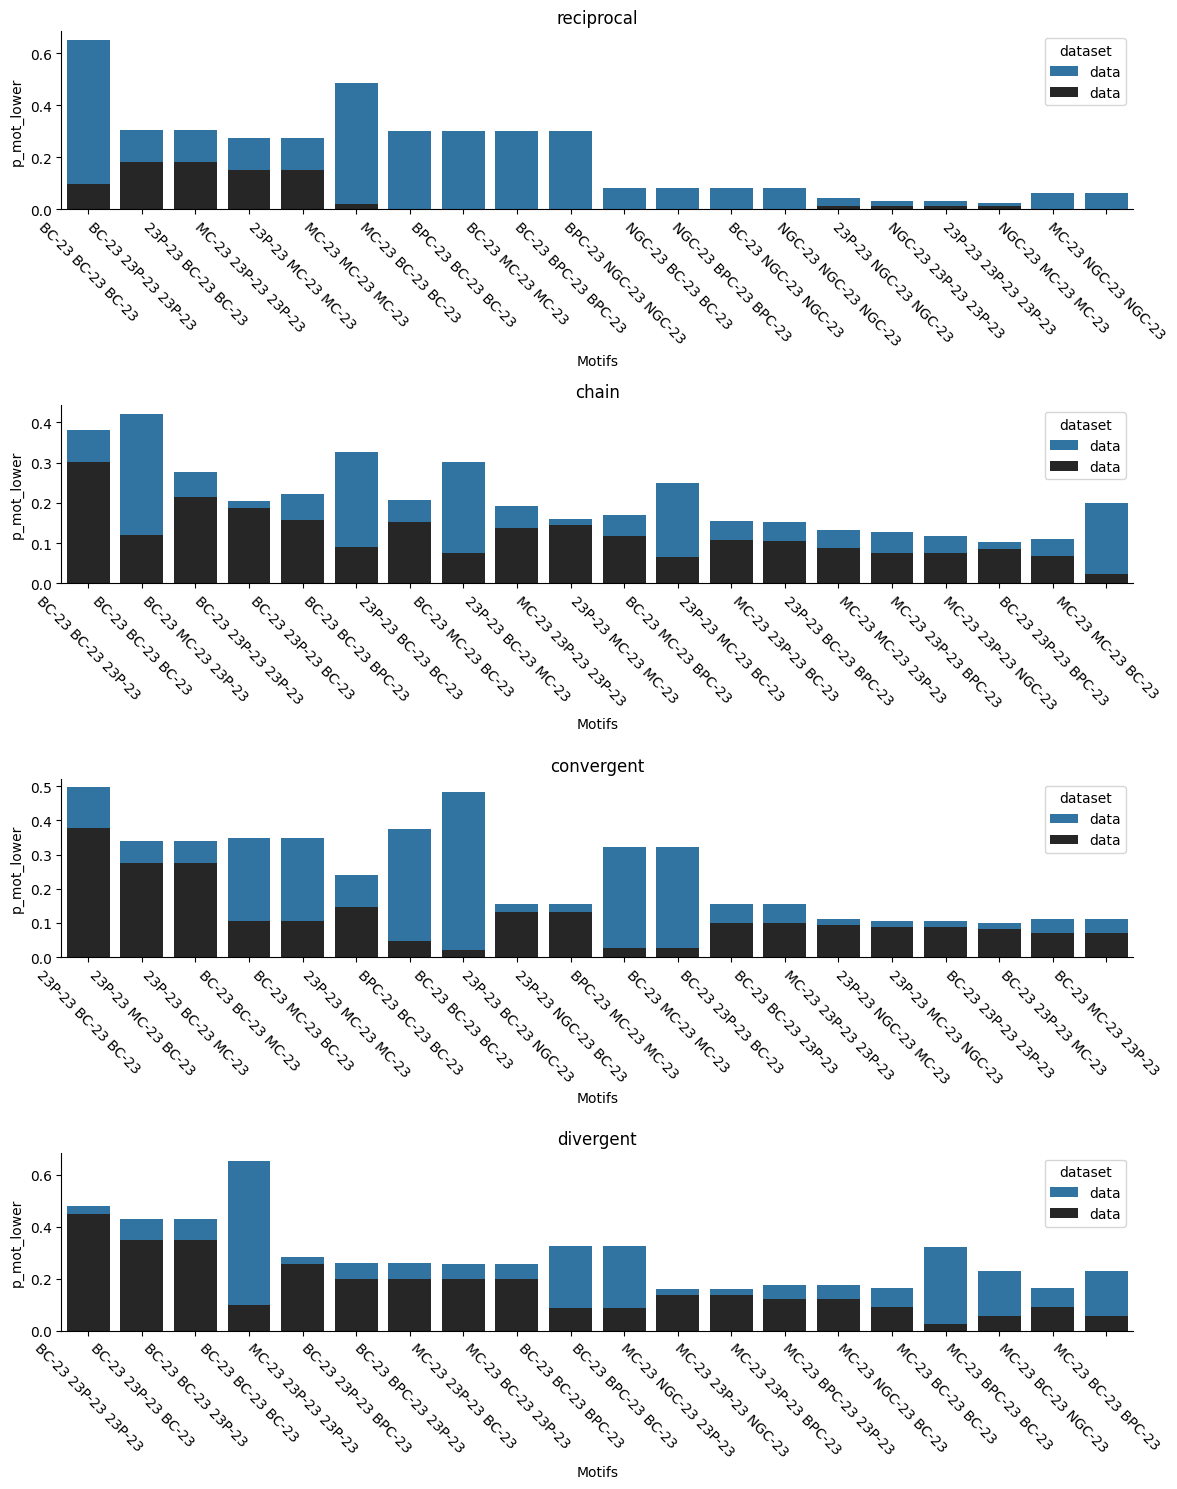

In [ ]:
#%% Adjusting dataframe cells
df_mot_all['Motifs'] = df_mot_all['motif_type'] + '_' + df_mot_all['neu_cat_0'] + '_' + df_mot_all['neu_cat_1'] + '_' + df_mot_all['neu_cat_2']
idxs_motifs_list = [i for i, x in enumerate(df_mot_all['Motifs']) if 'chain' in x]
df_mot_plot =df_mot_all.iloc[idxs_motifs_list]

#%% Plotting
models2plot = ['data', 'cloud_synapse_count', 'reyni_synapse_count']
#models2plot = ['data']
df_mot2plot = df_mot_all.loc[df_mot_all['dataset'].isin(models2plot),:]

plt.clf()
fig, ax = plt.subplots(4,1, figsize=(12,15))
for i_mot,motif_type in enumerate(['reciprocal', 'chain', 'convergent', 'divergent']):
    idxs_motifs_list = [i for i, x in enumerate(df_mot2plot['Motifs']) if motif_type in x]
    df_mot_plot = df_mot2plot.iloc[idxs_motifs_list]
    df_mot_top = df_mot_plot[df_mot_plot['dataset']=='data'].sort_values(by='p_mot')[::-1]
    top_motifs = df_mot_top['Motifs'].values[:20]
    df_mot_plot = df_mot_plot.loc[df_mot_plot['Motifs'].isin(top_motifs),:]
    category_type = pd.api.types.CategoricalDtype(categories=top_motifs, ordered=True)
    df_mot_plot['Motifs'] = df_mot_plot['Motifs'].astype(category_type)
    # dfall= pd.DataFrame.from_dict({'Motifs': motifs_list, 'tau':alltaus[idxs_taus], 'tau_cim':alltaus_errors_abs[idxs_taus,0], 'tau_cip':alltaus_errors_abs[idxs_taus,1],'syn': 'all'})
    sns.barplot(data=df_mot_plot, x='Motifs', y='p_mot_lower', hue='dataset', ci=None, ax=ax[i_mot],linewidth=0, edgecolor=".5")#, facecolor='black')
    sns.barplot(data=df_mot_plot, x='Motifs', y='motif probability intervals', hue='dataset', ci=None, ax=ax[i_mot],linewidth=0, color='white')
    # sns.barplot(data=df_mot_plot, x='Motifs', y='p_mot_upper', hue='dataset', ci=None, ax=ax[i_mot],linewidth=1, edgecolor=".5", color='white')#, facecolor=(0, 0, 0, 0))
    plt.setp(ax[i_mot].patches, linewidth=0)

    # plt.errorbar(x=np.arange(len(df_mot_all)), y=df_mot_all['p_mot'], yerr=np.abs(df_mot_all[['p_mot_lower', 'p_mot_upper']].values).transpose(), fmt='none', c= 'r')
    # plt.xticks(rotation=-45)
    labels = [' '.join(x.split('_')[1:]) for x in top_motifs]
    ax[i_mot].set_xticklabels(labels, rotation = -45)
    ax[i_mot].set_title(motif_type)

sns.despine()
plt.tight_layout()
plt.show()
